In [1]:
#Import library
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


## Exploratory Data Analysis

In [2]:
#load data
hp = pd.read_csv('boston.csv')
hp.head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


In [3]:
hp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   crim     506 non-null    float64
 1   zn       506 non-null    float64
 2   indus    506 non-null    float64
 3   chas     506 non-null    int64  
 4   nox      506 non-null    float64
 5   rm       506 non-null    float64
 6   age      506 non-null    float64
 7   dis      506 non-null    float64
 8   rad      506 non-null    int64  
 9   tax      506 non-null    int64  
 10  ptratio  506 non-null    float64
 11  black    506 non-null    float64
 12  lstat    506 non-null    float64
 13  medv     506 non-null    float64
dtypes: float64(11), int64(3)
memory usage: 55.5 KB


There is no missing value, expected data type is numerik (int or float) and get numerik data

In [4]:
# Statisctical Summary

hp.describe()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


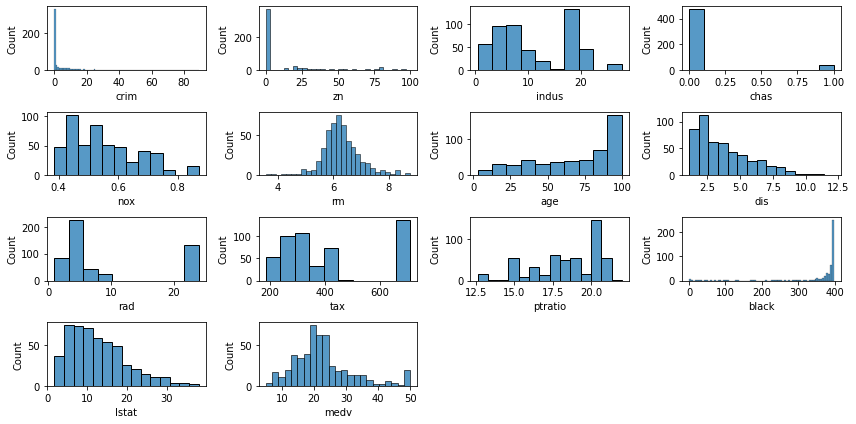

In [5]:
plt.figure(figsize=(12,6))
features = hp.columns
for i in range(0, len(features)):
    plt.subplot(4, len(features)//3, i+1)
    sns.histplot(x=hp[features[i]])
    plt.xlabel(features[i])
    plt.tight_layout()

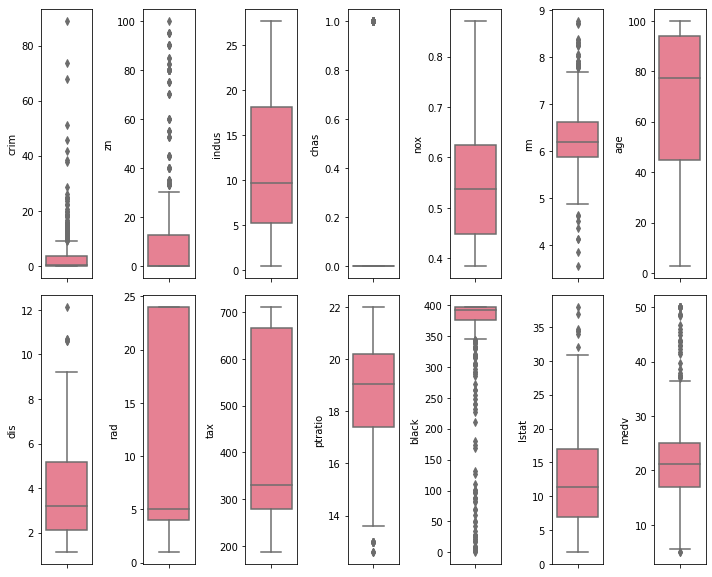

In [6]:
# plotting
plt.figure(figsize=(10,16))
features = hp.columns
for i in range(0, len(features)):
    plt.subplot(4, len(features)//2, i+1)
    sns.boxplot(y=hp[features[i]], palette='husl')
    plt.tight_layout()

# Predicting Housing Price
(Without Handling Outlier)

### Divide data into train, test and validation

In [7]:
from sklearn.model_selection import train_test_split

feature = hp.drop(columns='medv')
target = hp[['medv']]

feature_hp_pretrain, feature_hp_test, target_hp_pretrain, target_hp_test = train_test_split(
    feature, target, test_size=0.20, random_state=42
    )

feature_hp_train, feature_hp_validation, target_hp_train, target_hp_validation = train_test_split(
    feature_hp_pretrain, target_hp_pretrain, test_size=0.20, random_state=42
    )

In [8]:
feature_hp_pretrain.shape

(404, 13)

In [9]:
feature_hp_train.shape

(323, 13)

In [10]:
# calculate VIF scores
from statsmodels.stats.outliers_influence import variance_inflation_factor as vif 
from statsmodels.tools.tools import add_constant

X = add_constant(feature_hp_train)

vif_df = pd.DataFrame([vif(X.values, i) 
               for i in range(X.shape[1])], 
              index=X.columns).reset_index()
vif_df.columns = ['feature','vif_score']
vif_df = vif_df.loc[vif_df.feature!='const']
vif_df.sort_values(by=['vif_score'], ascending=False)

,feature,vif_score
10,tax,8.268145
9,rad,7.182410
5,nox,4.585650
8,dis,4.390458
3,indus,3.741988
7,age,3.127443
13,lstat,3.020946
2,zn,2.473421
6,rm,1.972174
11,ptratio,1.854101


There is feature with high VIF scores ( > 4):
1. `tax`
2. `rad`
3. `nox`
4. `dis`

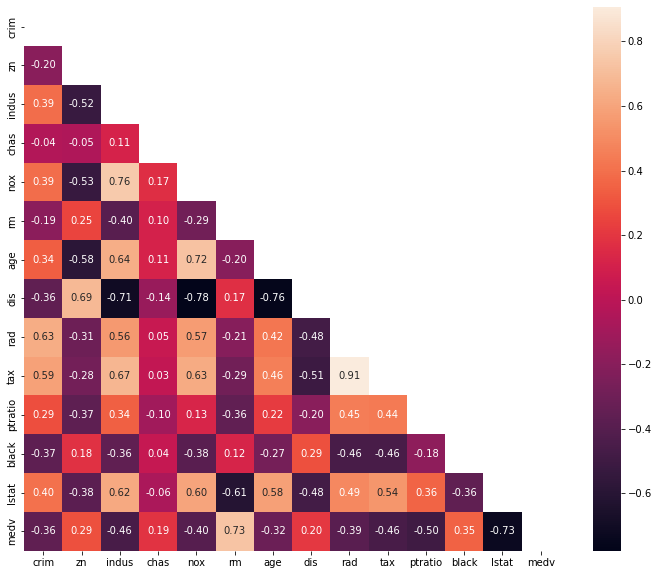

In [11]:
# heatmap correlation
admit_train = pd.concat([feature_hp_train, target_hp_train], axis=1)
corr = admit_train.corr()

plt.figure(figsize=(12,10))
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True
sns.heatmap(corr, mask=mask, annot=True, fmt='.2f')
plt.show()

-We will drop `rad` columns, why:
1. `rad` columns highly correlation with `tax` = 0.91
to present this feature, I decide to include only `tax`
because `tax` have higher correlation value that `rad`

-what about `nox` and `dis` columns?
they have high correlation, but still < (abs)0.8

In [12]:
#drop columns that have multicol
feature_hp_train = feature_hp_train.drop(columns= ['rad'])
feature_hp_validation= feature_hp_validation.drop(columns= ['rad'])
feature_hp_test = feature_hp_test.drop(columns= ['rad'])

In [13]:
# calculate VIF scores
from statsmodels.stats.outliers_influence import variance_inflation_factor as vif 
from statsmodels.tools.tools import add_constant

X = add_constant(feature_hp_train)

vif_df = pd.DataFrame([vif(X.values, i) 
               for i in range(X.shape[1])], 
              index=X.columns).reset_index()
vif_df.columns = ['feature','vif_score']
vif_df = vif_df.loc[vif_df.feature!='const']
vif_df.sort_values(by=['vif_score'], ascending=False)

,feature,vif_score
5,nox,4.552308
8,dis,4.390362
3,indus,3.500250
9,tax,3.191363
7,age,3.119817
12,lstat,3.004498
2,zn,2.415036
6,rm,1.923266
10,ptratio,1.804558
1,crim,1.615076


# RIDGE

In [18]:
from sklearn.linear_model import Ridge

# train the model
X_hpridge_train = feature_hp_train.to_numpy()
y_hpridge_train = target_hp_train.to_numpy()
y_hpridge_train = y_hpridge_train.reshape(len(y_hpridge_train),)

# define the model
ridge_reg_pointzeroone = Ridge(alpha=0.01, random_state=42)
ridge_reg_pointone = Ridge(alpha=0.1, random_state=42)
ridge_reg_one = Ridge(alpha=1, random_state=42)
ridge_reg_ten = Ridge(alpha=10, random_state=42)


# fit the model (training)
ridge_reg_pointzeroone.fit(X_hpridge_train, y_hpridge_train)
ridge_reg_pointone.fit(X_hpridge_train, y_hpridge_train)
ridge_reg_one.fit(X_hpridge_train, y_hpridge_train)
ridge_reg_ten.fit(X_hpridge_train, y_hpridge_train)

Ridge(alpha=10, random_state=42)

In [19]:
from sklearn.metrics import mean_squared_error

X_hpridge_validation = feature_hp_validation.to_numpy()
y_hpridge_validation = target_hp_validation.to_numpy()
y_hpridge_validation = y_hpridge_validation.reshape(len(y_hpridge_validation),)

alphas = [0.01, 0.1, 1., 10]
models = [ridge_reg_pointzeroone,
          ridge_reg_pointone,
          ridge_reg_one,
          ridge_reg_ten]

for model, alpha in zip(models, alphas):
    y_predictridge_validation = model.predict(X_hpridge_validation)
    rmse = np.sqrt(mean_squared_error(y_hpridge_validation,y_predictridge_validation))
    print(f'RMSE of Ridge regression model with alpha = {alpha} is {rmse}')

RMSE of Ridge regression model with alpha = 0.01 is 4.960676932957845
RMSE of Ridge regression model with alpha = 0.1 is 4.949412535122791
RMSE of Ridge regression model with alpha = 1.0 is 4.912351371579993
RMSE of Ridge regression model with alpha = 10 is 4.871717983886227


The best model evaluation is alpha 10 with the result is 4.8

In [20]:
ridge_best = ridge_reg_ten

coef_df = pd.DataFrame({
    'feature':['intercept'] + feature_hp_train.columns.tolist(),
    'coefficient':[ridge_best.intercept_] + list(ridge_best.coef_)
})

coef_df

,feature,coefficient
0,intercept,15.064666
1,crim,-0.071408
2,zn,0.033030
3,indus,-0.067858
4,chas,1.955801
5,nox,-1.568248
6,rm,4.783168
7,age,-0.011523
8,dis,-1.260056
9,tax,-0.001976


### Interpretation the model evaluation :

medv = 15.064666 + -0.071408 crim + 0.033030 zn + -0.067858 indus + 1.955801 chas + -1.568248 nox + 4.783168 rm + -0.011523 age + -1.260056 dis + -0.001976 tax + -0.697550 p ration + 0.012729 black + -0.523827 lstat

interpretation example : An increase of 1 point tax, we assume that other features is fixed, is assosiated increase of -0.00198 point in medv

In [21]:
from sklearn.metrics import r2_score

y_predictridge_train = ridge_best.predict(X_hpridge_train)

print('R-squared for training data is {}'.format(r2_score(y_hpridge_train, y_predictridge_train)))

R-squared for training data is 0.748587526366982


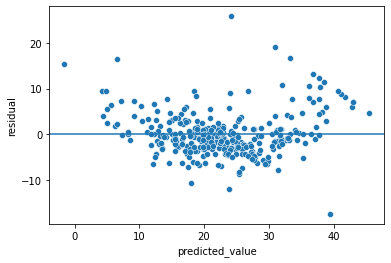

In [22]:
# calculate residuals
residual = y_hpridge_train - y_predictridge_train

# prepare dataframe
# 1 predictor --> predictor VS residual
df_resid = pd.DataFrame({
    'predicted_value': y_predictridge_train,
    'residual': residual
})

# residual plot
sns.scatterplot(data=df_resid, x="predicted_value", y="residual")
plt.axhline(0)
plt.show()

In [30]:
y_predictridge_train = ridge_best.predict(X_hpridge_train)

In [33]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_absolute_percentage_error

print('RMSE for training data is {}'.format(np.sqrt(mean_squared_error(y_hpridge_train, y_predictridge_train))))
print('MAE for training data is {}'.format(mean_absolute_error(y_hpridge_train, y_predictridge_train)))
print('MAPE for training data is {}'.format(mean_absolute_percentage_error(y_hpridge_train, y_predictridge_train)))

RMSE for training data is 4.77864036104011
MAE for training data is 3.3776762058865626
MAPE for training data is 0.16868073663359498


In [34]:
# prepare prediction result on test data
X_hpridge_test = feature_hp_test.to_numpy()
y_predictridge_test = ridge_best.predict(X_hpridge_test)

# ground truth target
y_hpridge_test = target_hp_test.to_numpy()
y_hpridge_test = y_hpridge_test.reshape(len(y_hpridge_test),)

In [35]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_absolute_percentage_error

print('RMSE for testing data is {}'.format(np.sqrt(mean_squared_error(y_hpridge_test, y_predictridge_test))))
print('MAE for testing data is {}'.format(mean_absolute_error(y_hpridge_test, y_predictridge_test)))
print('MAPE for testing data is {}'.format(mean_absolute_percentage_error(y_hpridge_test, y_predictridge_test)))

RMSE for testing data is 5.158908333657056
MAE for testing data is 3.244481645704498
MAPE for testing data is 0.17618402626767932


Summary :

1. Standart deviation of prediction error is 5.16, so the residual mostly deviate between +- 5.16
2. On average, our prediction deviates the true by 3.2%, equivalent to 17.6%
3. Not indicated as a overfitting or under fitting because prediction result training and testing does not much different

# LASSO

In [36]:
from sklearn.linear_model import Lasso

# train the model
X_hplasso_train = feature_hp_train.to_numpy()
y_hplasso_train = target_hp_train.to_numpy()
y_hplasso_train = y_hplasso_train.reshape(len(y_hplasso_train),)

# define the model
lasso_reg_pointzeroone = Lasso(alpha=0.01, random_state=42)
lasso_reg_pointone = Lasso(alpha=0.1, random_state=42)
lasso_reg_one = Lasso(alpha=1, random_state=42)
lasso_reg_ten = Lasso(alpha=10, random_state=42)


# fit the model (training)
lasso_reg_pointzeroone.fit(X_hplasso_train, y_hplasso_train)
lasso_reg_pointone.fit(X_hplasso_train, y_hplasso_train)
lasso_reg_one.fit(X_hplasso_train, y_hplasso_train)
lasso_reg_ten.fit(X_hplasso_train, y_hplasso_train)


Lasso(alpha=10, random_state=42)

In [55]:
from sklearn.metrics import mean_squared_error

X_hplasso_validation = feature_hp_validation.to_numpy()
y_hplasso_validation = target_hp_validation.to_numpy()
y_hplasso_validation = y_hplasso_validation.reshape(len(y_hplasso_validation),)

alphas = [0.01, 0.1, 1., 10]
models = [lasso_reg_pointzeroone,
          lasso_reg_pointone,
          lasso_reg_one,
          lasso_reg_ten]

for model, alpha in zip(models, alphas):
    y_predictlasso_validation = model.predict(X_hplasso_validation)
    rmse = np.sqrt(mean_squared_error(y_hplasso_validation,y_predictlasso_validation))
    print(f'RMSE of Lasso regression model with alpha = {alpha} is {rmse}')

RMSE of Lasso regression model with alpha = 0.01 is 4.934105658639752
RMSE of Lasso regression model with alpha = 0.1 is 4.907145314259478
RMSE of Lasso regression model with alpha = 1.0 is 4.845855910636398
RMSE of Lasso regression model with alpha = 10 is 5.426622694252769


The best model evaluation is alpha 1 with the result is 4.8

In [56]:
lasso_best = lasso_reg_one

coef_df = pd.DataFrame({
    'feature':['intercept'] + feature_hp_train.columns.tolist(),
    'coefficient':[lasso_best.intercept_] + list(lasso_best.coef_)
})

coef_df

,feature,coefficient
0,intercept,25.823435
1,crim,-0.041076
2,zn,0.025273
3,indus,-0.000000
4,chas,0.000000
5,nox,-0.000000
6,rm,2.504122
7,age,0.022055
8,dis,-0.599362
9,tax,-0.002994


medv = 25.823435 + -0.041076 crim + -0.000000 zn + 0.000000 indus + -0.000000 chas + -0.000000 nox + 2.504122 rm + 0.022055 age + -0.599362 dis + -0.002994 tax + -0.666222 pration + 0.011400 black + -0.712433 lstat

interpretation example : An increase of 1 point tax, we assume that other features is fixed, is assosiated increase of -0.002994 point in medv

In [58]:
from sklearn.metrics import r2_score

y_predictlasso_train = lasso_best.predict(X_hplasso_train)

print('R-squared for training data is {}'.format(r2_score(y_hplasso_train, y_predictlasso_train)))

R-squared for training data is 0.7056815963218595


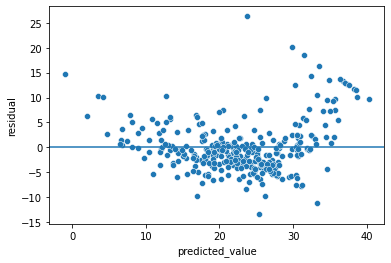

In [59]:
# calculate residuals
residuallasso = y_hplasso_train - y_predictlasso_train

# prepare dataframe
# 1 predictor --> predictor VS residual
df_resid = pd.DataFrame({
    'predicted_value': y_predictlasso_train,
    'residual': residuallasso
})

# residual plot
sns.scatterplot(data=df_resid, x="predicted_value", y="residual")
plt.axhline(0)
plt.show()

In [60]:
y_predictlasso_train = lasso_best.predict(X_hplasso_train)

In [61]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_absolute_percentage_error

print('RMSE for training data is {}'.format(np.sqrt(mean_squared_error(y_hplasso_train, y_predictlasso_train))))
print('MAE for training data is {}'.format(mean_absolute_error(y_hplasso_train, y_predictlasso_train)))
print('MAPE for training data is {}'.format(mean_absolute_percentage_error(y_hplasso_train, y_predictlasso_train)))

RMSE for training data is 5.170346463296143
MAE for training data is 3.6858416211465084
MAPE for training data is 0.1749128202363825


In [62]:
# prepare prediction result on test data
X_hplasso_test = feature_hp_test.to_numpy()
y_predictlasso_test = lasso_best.predict(X_hplasso_test)

# ground truth target
y_hplasso_test = target_hp_test.to_numpy()
y_hplasso_test = y_hplasso_test.reshape(len(y_hplasso_test),)

In [63]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_absolute_percentage_error

print('RMSE for testing data is {}'.format(np.sqrt(mean_squared_error(y_hplasso_test, y_predictlasso_test))))
print('MAE for testing data is {}'.format(mean_absolute_error(y_hplasso_test, y_predictlasso_test)))
print('MAPE for testing data is {}'.format(mean_absolute_percentage_error(y_hplasso_test, y_predictlasso_test)))

RMSE for testing data is 5.125494212319777
MAE for testing data is 3.3980507105960682
MAPE for testing data is 0.17856606338732206


Summary :

1. Standart deviation of prediction error is 5.12, so the residual mostly deviate between +- 5.12
2. On average, our prediction deviates the true by 3.4%, equivalent to 17.8%
3. Not indicated as a overfitting or under fitting because prediction result training and testing does not much different

# the best model for this prediction is using Ridge regularization with lambda 